In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [3]:
train = pd.read_csv('train.csv')

**Cek isi Dataset**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Data Exploration

## Target : Response

,Response,count,persentase
0,0,334399,87.74
1,1,46710,12.26


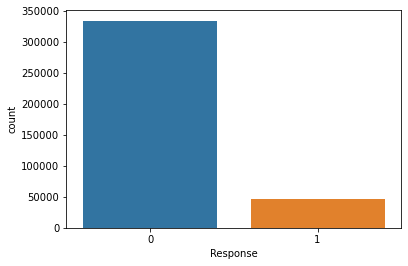

In [5]:
g = train['Response'].value_counts().reset_index()
g = g.rename(columns={'Response' : 'count', 'index' : 'Response'})
g['persentase'] = round((g['count']/train['Response'].count())*100,2)
display(g)

y = g['persentase']
sns.barplot(x='Response', y='count', data=g);

Dari plot diperoleh bahwa terjadi class imbalance : customer yang tidak interested jauh lebih banyak dibandingkan customer yang interested. Customer yang interested 87%. 

## Gender Variable 

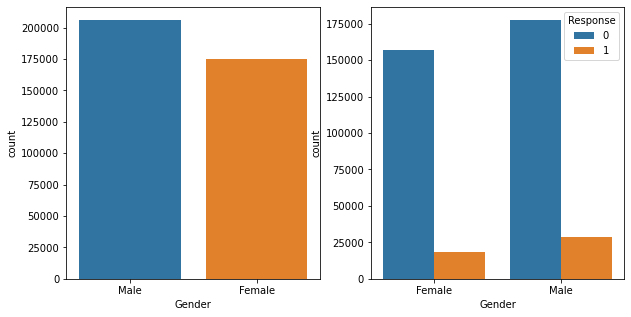

In [6]:
gen = train.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns={'id' : 'count'}).reset_index()

fig, ax = plt.subplots(1,2, figsize=(10,5))
af = sns.countplot(x='Gender', data=train, ax = ax[0])
bf = sns.barplot(x='Gender', y='count', data = gen, hue='Response', ax= ax[1])

* Variabel gender dalam dataset dapat dikatakan seimbang (terdistribusi secara merata)
* Gender Male sedikit lebih banyak daripada Female dan yg interested terhadap Asuransi Kendaraan juga sedikit lebih tinggi.

## Age Variable

<Figure size 720x576 with 0 Axes>

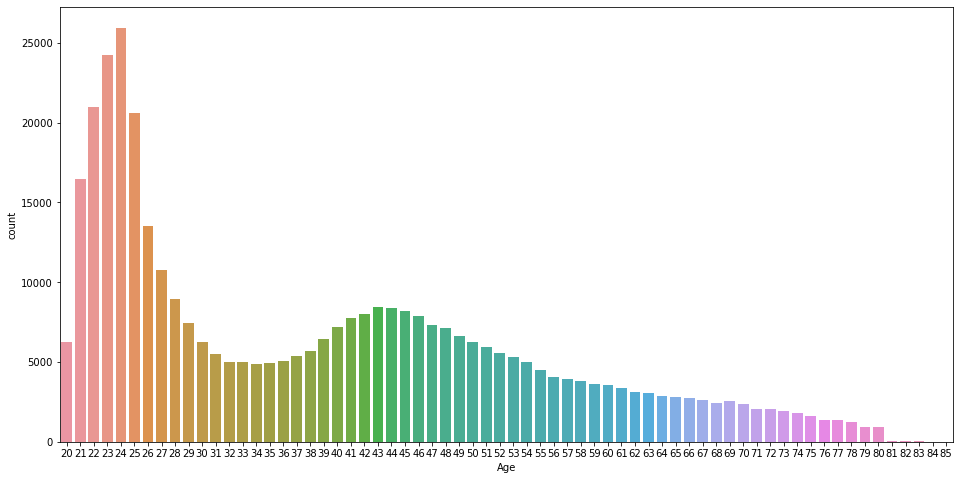

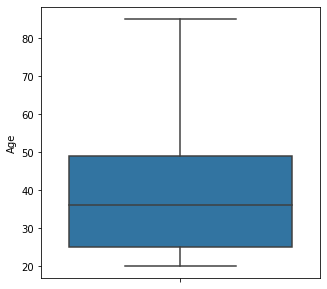

In [7]:
plt.figure(figsize=(10,8))
plt.subplots(1,1, figsize = (16,8))
age1 = sns.countplot(x = 'Age', data=train);

plt.subplots(1,1, figsize = (5,5))
age2 = sns.boxplot(y = 'Age', data=train);

#plt.subplots(1,1, figsize = (16,8))
#age3 = sns.distplot(train['Age']);


* Data didominasi oleh customer usia 21 - 28. 
* Customer terbanyak yaitu customer usia 24 tahun. 
* Dari boxplot customer, dapat dilihat bahwa tidak ada outliers. 

## Driving License Variable 

,Driving_License,Response,id
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


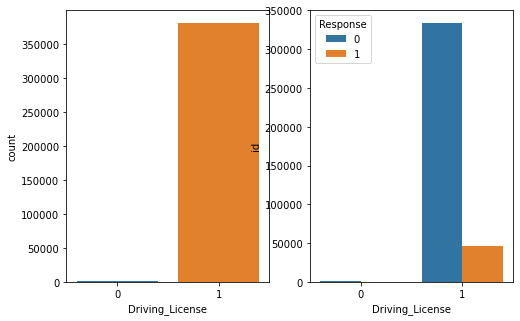

In [8]:
dr = train.groupby(['Driving_License', 'Response'])['id'].count().reset_index()
display(dr)

figd,ax = plt.subplots(1,2, figsize = (8,5))
axdr1 = sns.countplot(x='Driving_License', data=train, ax=ax[0])
axdr2 = sns.barplot(x='Driving_License', y ='id', hue='Response', data = dr, ax = ax[1])

* Lebih dari 99 % customer memiliki driving license 
* Customer yang memiliki driving license cenderung berminat dengan asuransi kendaraan

## Region Code Variable

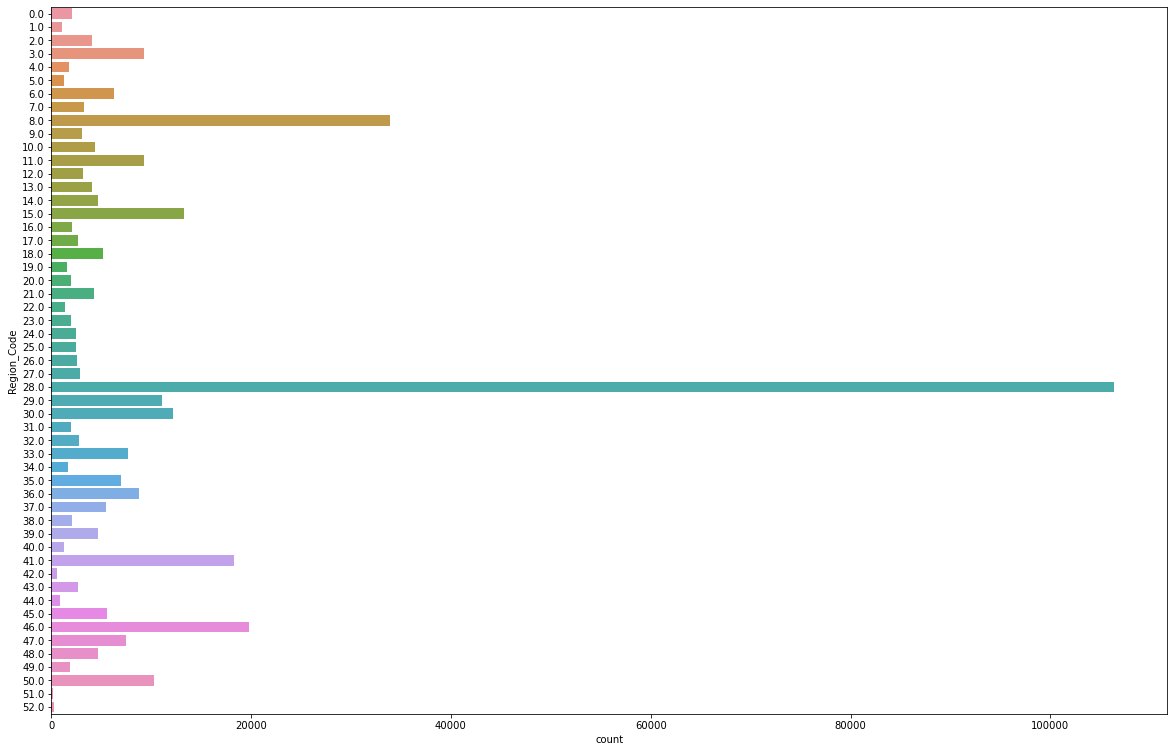

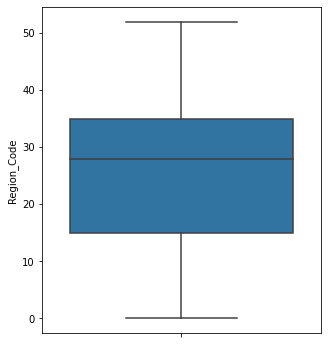

In [9]:
plt.subplots(1,1, figsize = (20,13))
figreg1 = sns.countplot(y='Region_Code', data=train)

plt.subplots(1,1, figsize = (5,6))
figreg2 = sns.boxplot(y='Region_Code', data=train)

* Jumlah customer pada Region code 28 jauh lebih banyak dibandingkan wilayah lainnya .
* Dari boxplot diperoleh tidak ada outlier. 

## Previously Insured Variable 

,Previously_Insured,Response,count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


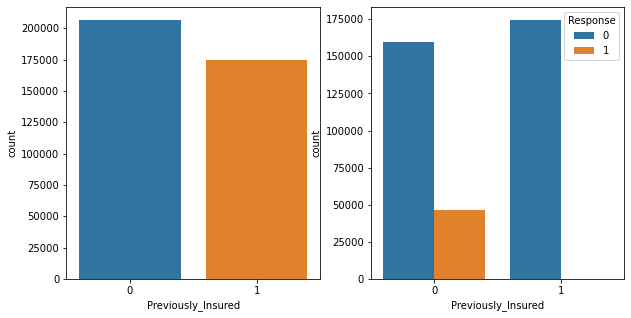

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figpi1 = sns.countplot(x='Previously_Insured', data=train, ax = ax[0])
pi = train.groupby(['Previously_Insured', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figpi2 = sns.barplot(x='Previously_Insured', y = 'count', hue='Response', data= pi, ax = ax[1])
display(pi)

* Customer yang sebelumnya sudah memiliki asuransi kendaraan dan yang belum hampir sama jumlahnya. 
* Customer yang sebelumnya sudah pernah memiliki asuransi kendaraan cenderung tidak berminat dengan asuransi kendaraan. Sebaliknya, Customer yang belum memiliki asuransi kendaraan kemungkinan berminat membeli polis asuransi kendaraan.

## Vehicle Age Variable 

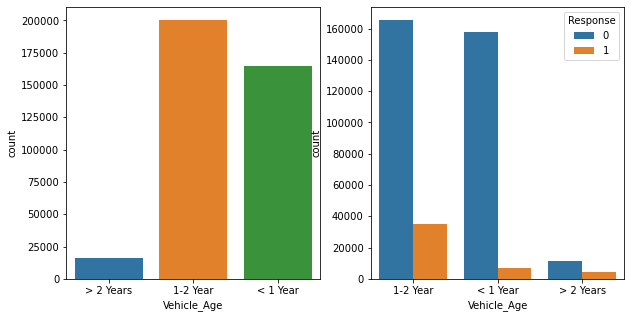

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figva1 = sns.countplot(x='Vehicle_Age', data=train, ax = ax[0])
pi = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figva2 = sns.barplot(x='Vehicle_Age', y = 'count', hue='Response', data= pi, ax = ax[1])

* Junmlah customer dengan usia kendaraan lebih dari 2 tahun sangat sedikit.
* Customer dengan usia kendaraan 1-2 tahun cenderung lebih tertarik dibandingkan dnegan customer dengan usia kendaraan <1 tahun dan > 2 tahun.

## Vechicle damage

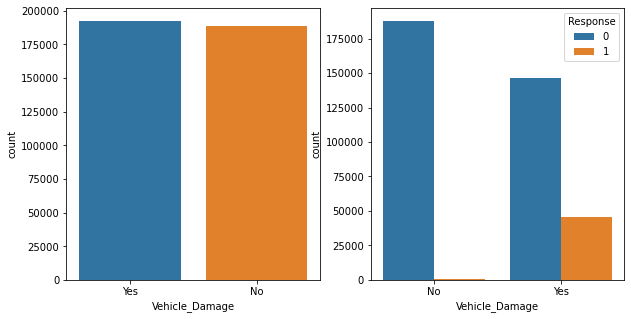

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
figvd1 = sns.countplot(x='Vehicle_Damage', data=train, ax = ax[0])
pi = train.groupby(['Vehicle_Damage', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
figvd2 = sns.barplot(x='Vehicle_Damage', y = 'count', hue='Response', data= pi, ax = ax[1])

* Jumlah customer dengan kendaraan pernah rusak dan tidak pernah rusak relatif seimbang. 
* Customer yang kendaraannya pernah rusak kemungkinan berminat dengan asuransi kendaraan. 

## Annual Premium Variable

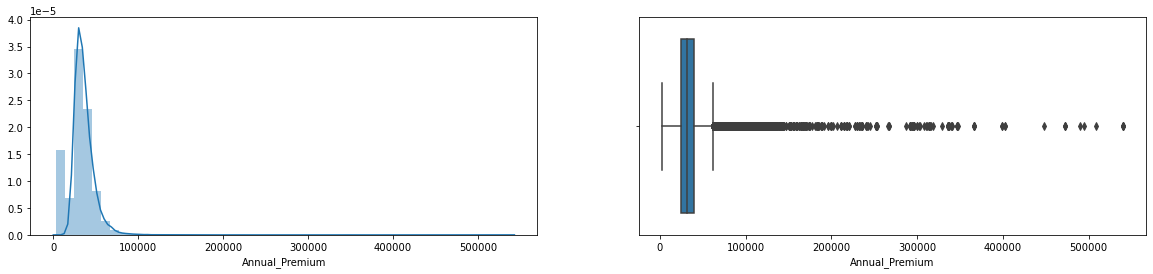

In [13]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Annual_Premium'], ax = ax[0])
figap2 = sns.boxplot(x='Annual_Premium', data=train, ax = ax[1])

* Dari histogram, dapat dilihat bahwa distribusi premi tahunan positively skewed. 
* Dari boxplot, dapat dilihat bahwa banyak outlier dari variabel annual premium. 

## Policy Sales Channel Variable

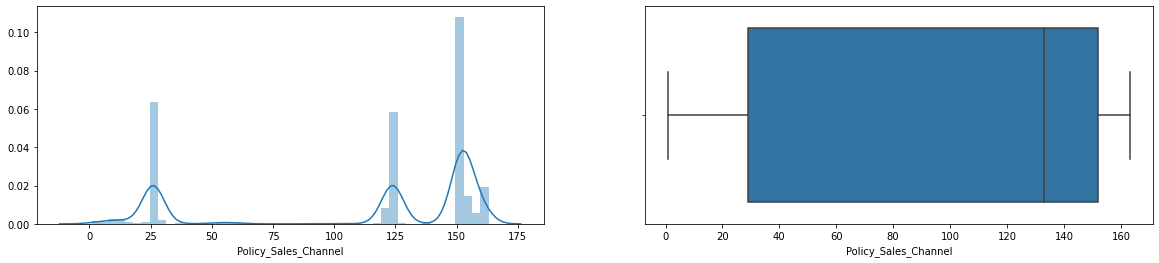

In [14]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Policy_Sales_Channel'], ax = ax[0])

#plt.subplots(1,1, figsize=(10,4))
figap2 = sns.boxplot(x='Policy_Sales_Channel', data=train, ax = ax[1])

## Vintage Number of Days

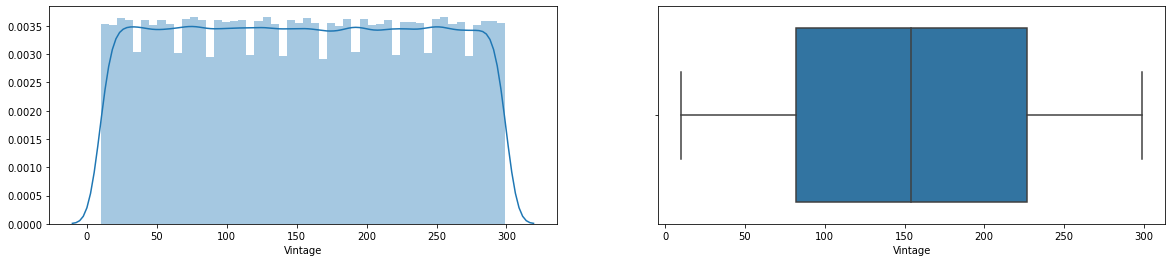

In [15]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
figap1 = sns.distplot(train['Vintage'], ax = ax[0])

#plt.subplots(1,1, figsize=(10,4))
figap2 = sns.boxplot(x='Vintage', data=train, ax = ax[1])

* Dapat dilihat dari boxplot bahwa tidak ada outliers pada variabel vintage. 

# EDA

**Pisahkan feature numerik dan kategori**

In [16]:
nums = ['Age', 'Driving_License', 'Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel',
       'Vintage','Response']

cats = ['Gender','Vehicle_Age','Vehicle_Damage']

## Descriptive Statistics

### Statistical Summary Feature Numerik

In [17]:
train[nums].describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Statistical Summary Feature Kategori

In [18]:
train[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


### Value Counting

In [19]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom Gender:
Male      206089
Female    175020
Name: Gender, dtype: int64

Value count kolom Vehicle_Age:
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Value count kolom Vehicle_Damage:
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64



* Customer berusia 20 hingga 85 tahun
* Terdapat 53 `Region_Code`
* Lama waktu customer memiliki asuransi di perusahaan yaitu 10 hari sampai 299 hari.
* Distribusi `Gender` dan `Vehicle Damage` relatif seimbang
* Customer yang usia kendaraanya lebih dari 2 tahun sangat sedikit.

## Univariate Analysis 

### Boxplot 

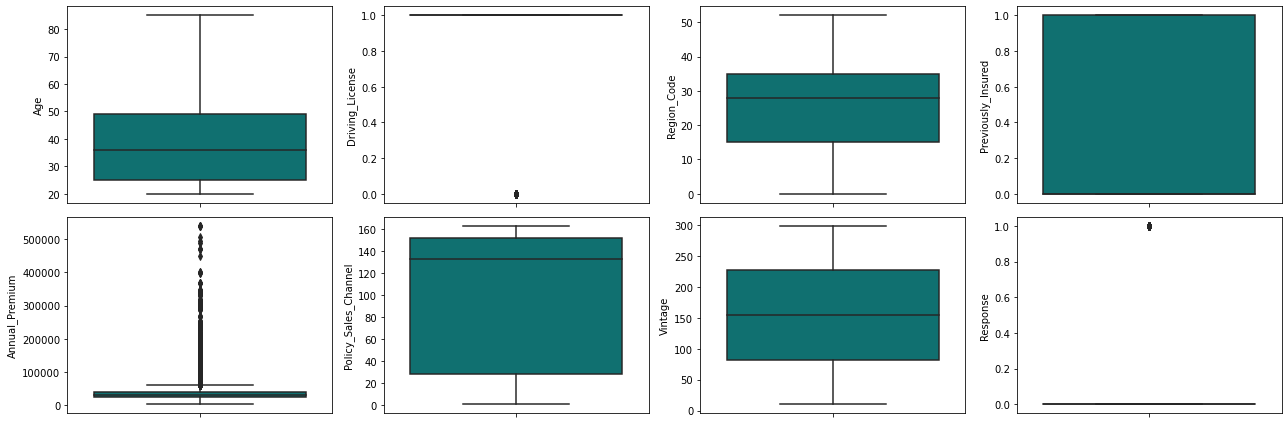

In [20]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(18, 6))
for i in range(0, len(nums)):
    plt.subplot(2, np.ceil(len(nums)/2), i+1)
    sns.boxplot(train[nums[i]], color='teal', orient='v')
    plt.tight_layout()

### Distplots

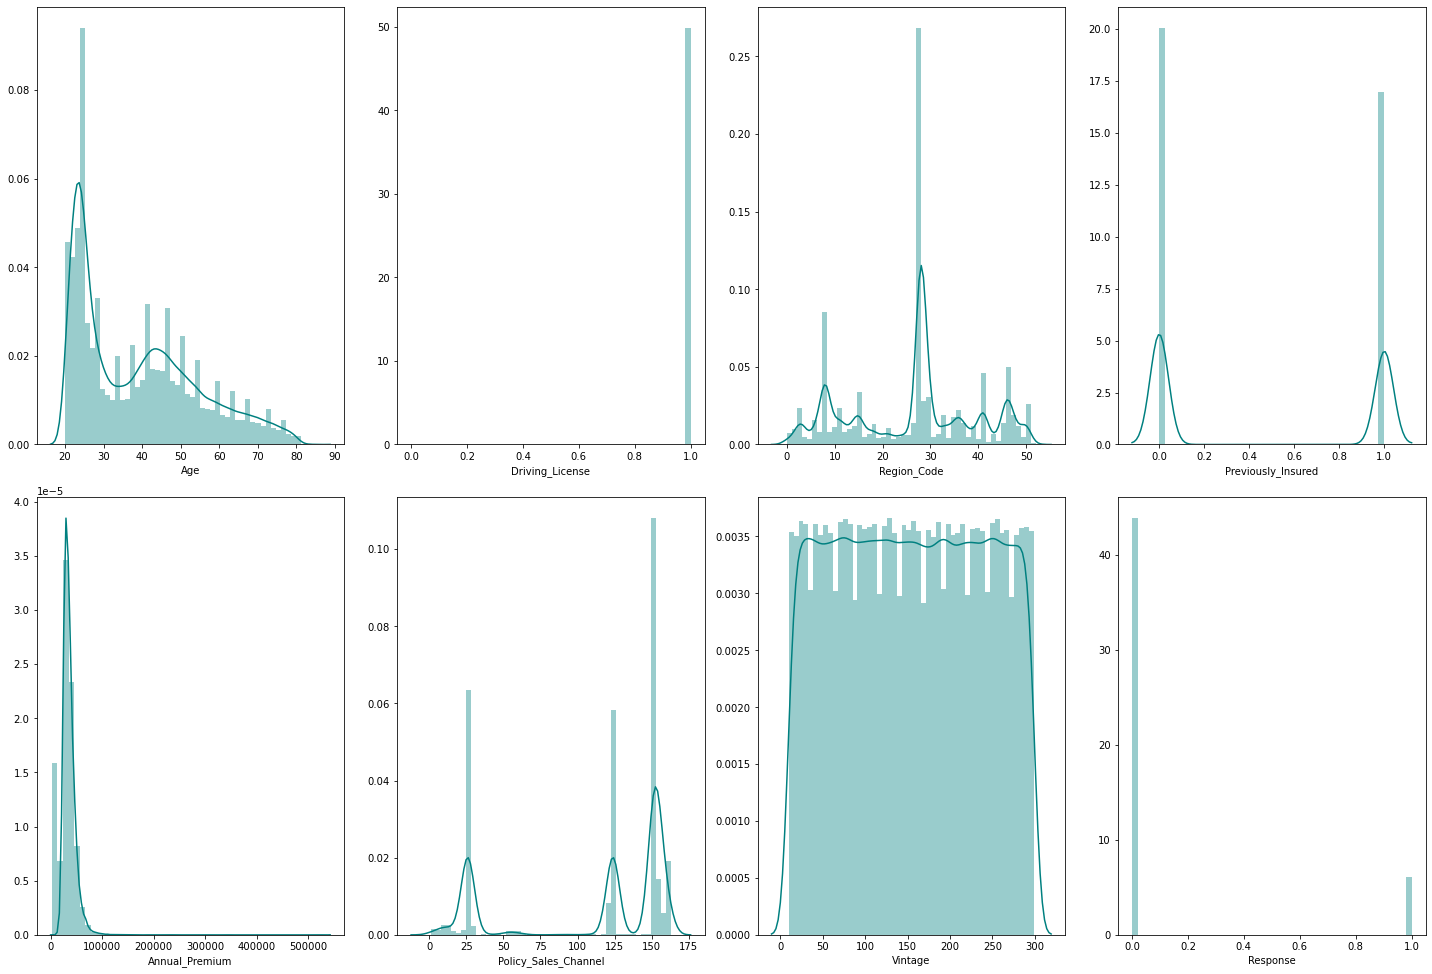

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 20))
for i in range(0, len(nums)):
    plt.subplot(3, np.ceil(len(nums)/2), i+1)
    sns.distplot(train[nums[i]], color='teal')
    plt.tight_layout()

### Countplot

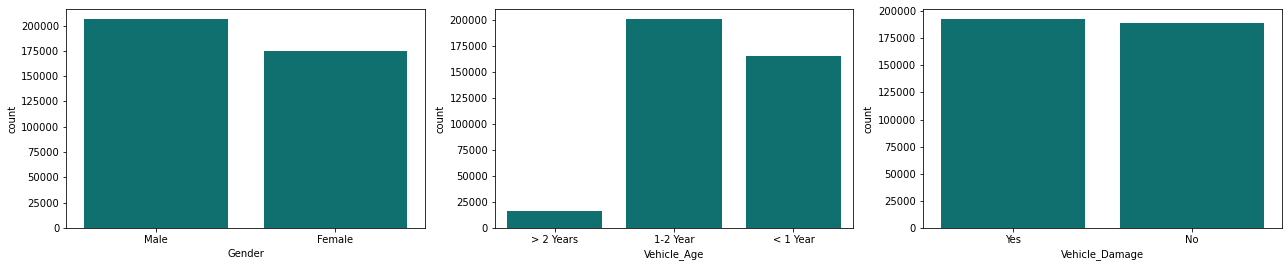

In [22]:
plt.figure(figsize=(18,7))
for i in range(0, len(cats)):
    plt.subplot(2, len(cats), i+1)
    sns.countplot(train[cats[i]], color='teal', orient='v')
    plt.tight_layout()

## Bivariate Analysis

### Correlation Heatmap

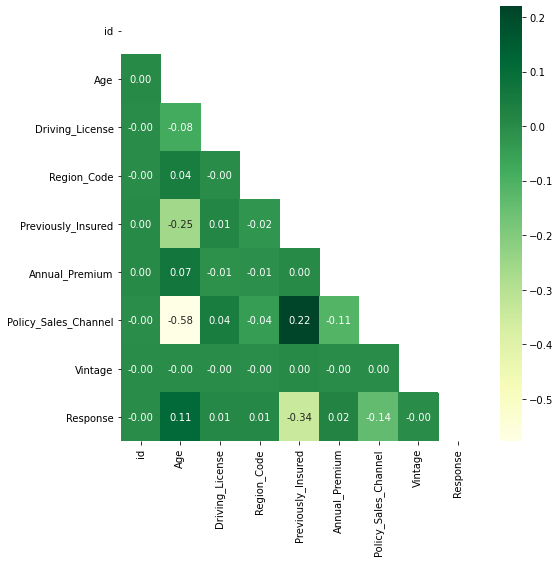

In [23]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), cmap='YlGn', mask=mask, annot=True, fmt='.2f');

### Pairplot

<Figure size 1440x1440 with 0 Axes>

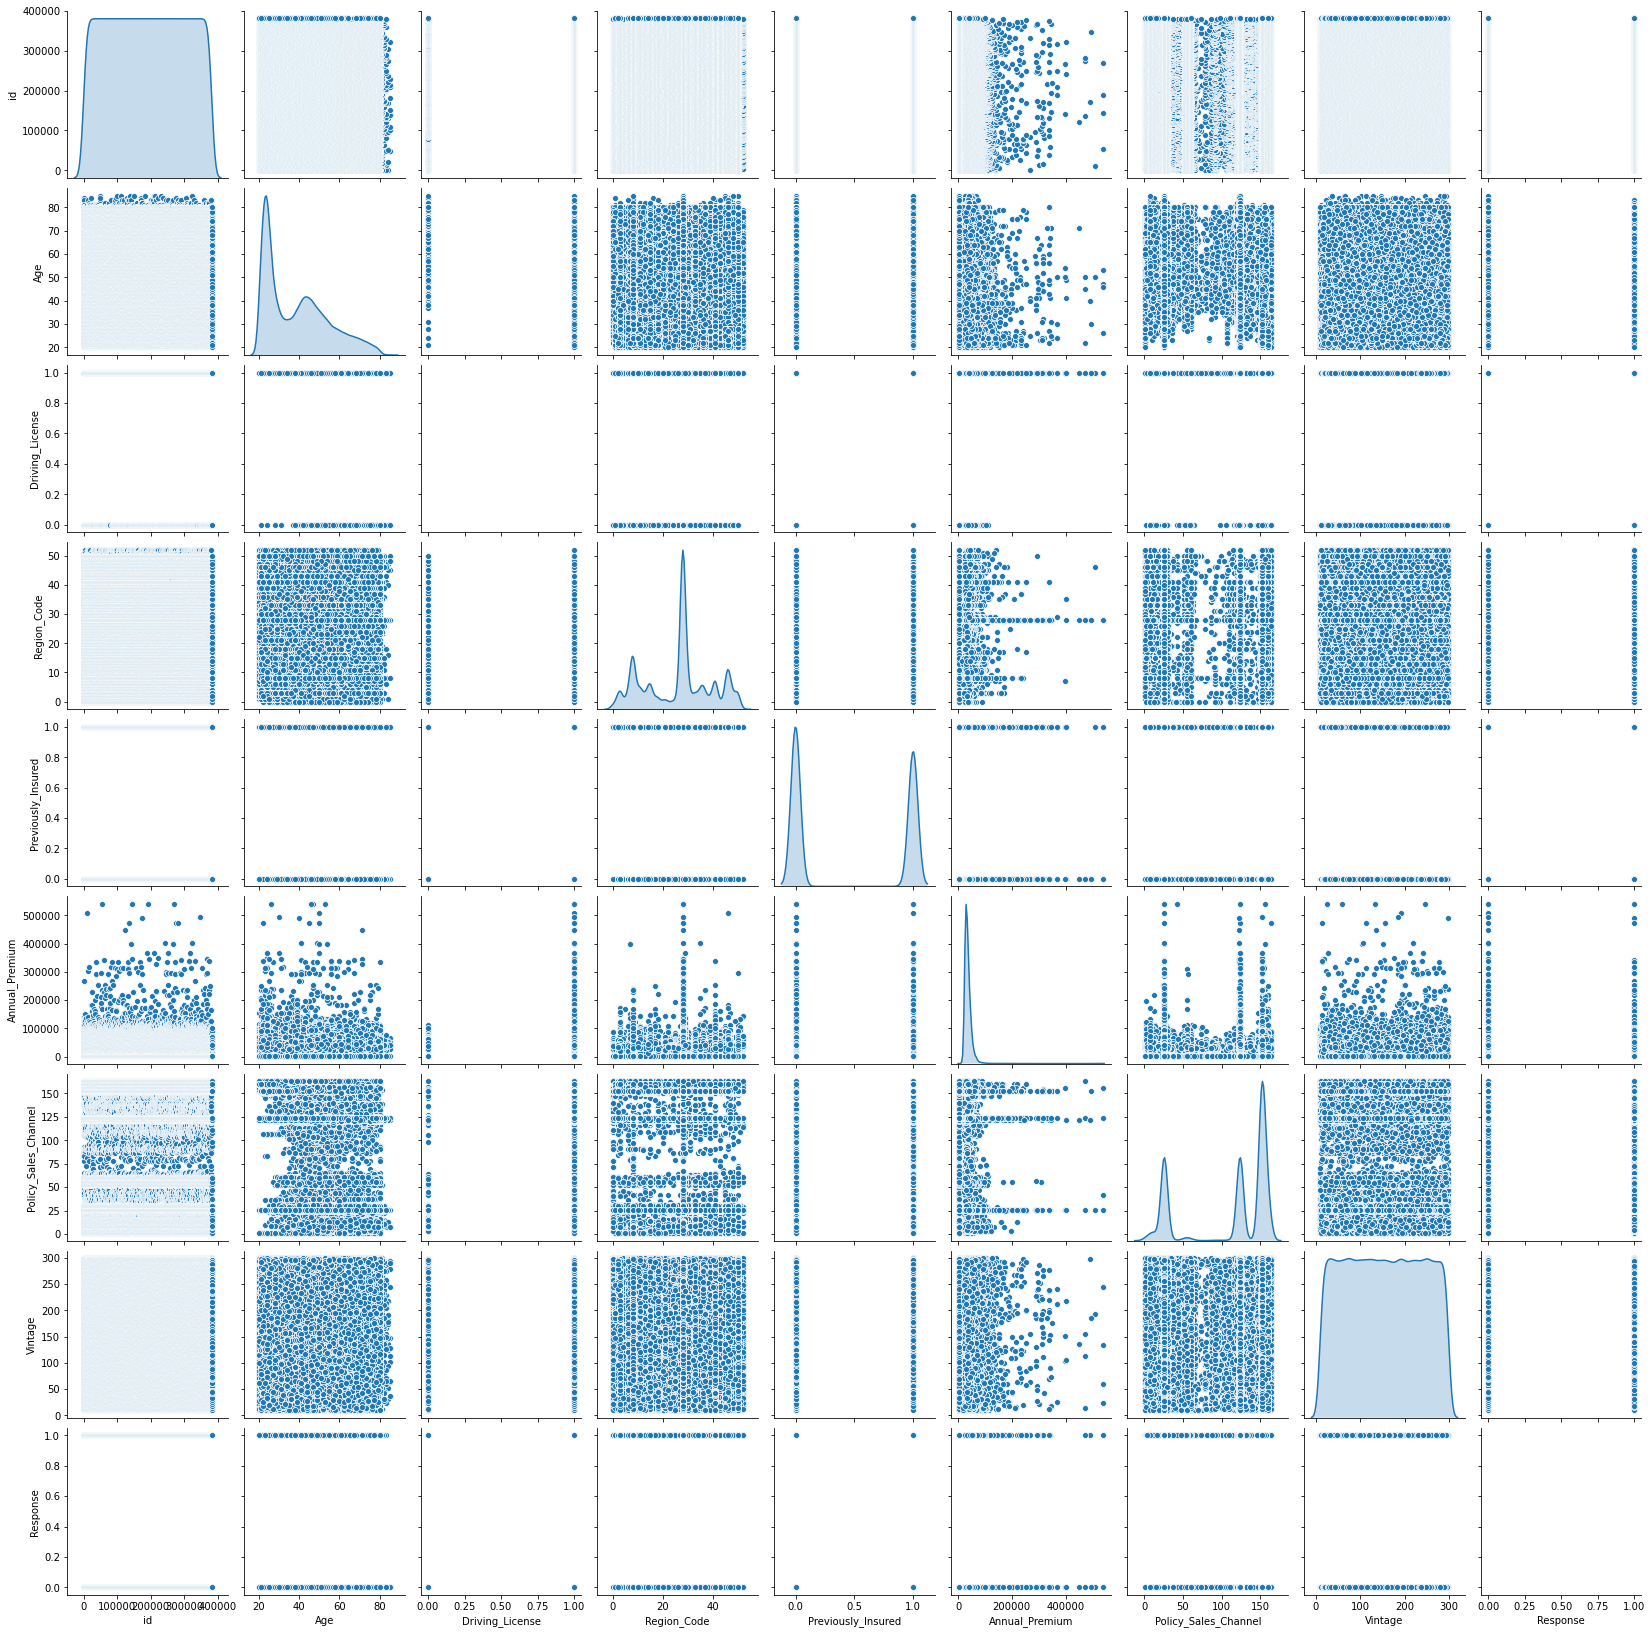

In [24]:
plt.figure(figsize=(20, 20))
sns.pairplot(train, diag_kind='kde')

### Category Plots

## EDA Conslusion

* Terjadi class imbalance pada distribusi data target `Response` antara customer yang berminat dan tidak berminat Asuransi Kendaraan sehingga perlu dilakukan Oversampling atau Undersampling. 
* Distribusi `Gender`, `Previously Insured`, `Vehicle Damage` relatif seimbang.
* Customer terbanyak yaitu customer `usia` 24 tahun.
* Lebih dari 99 % customer memiliki `Driving License` dan Customer yang memiliki driving license cenderung berminat dengan asuransi kendaraan
* Jumlah customer pada `Region Code` 28 jauh lebih banyak dibandingkan wilayah lainnya .
* `Previously Insured` : Customer yang sebelumnya sudah pernah memiliki asuransi kendaraan cenderung tidak berminat dengan asuransi kendaraan. Sebaliknya, Customer yang belum memiliki asuransi kendaraan kemungkinan berminat membeli polis asuransi kendaraan.
* `Vehicle Age` : Junmlah customer dengan usia kendaraan lebih dari 2 tahun sangat sedikit.
* Customer dengan usia kendaraan 1-2 tahun cenderung lebih tertarik dibandingkan dnegan customer dengan usia kendaraan <1 tahun dan > 2 tahun.
* `Vehicle Damage` : Customer yang kendaraannya pernah rusak kemungkinan berminat dengan asuransi kendaraan. 
* `Annual Premium` :  distribusi premi tahunan positively skewed dan terdapat banyak outlier.

# Data Preprocessing

In [26]:
df = pd.read_csv('train.csv', index_col='id')

In [27]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

## Check Missing Value 

In [28]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* Tidak ada missing value 

## Check Duplicate Data

In [29]:
train.duplicated().sum()

0

* Tidak ada data duplikat

## Feature Engineering

**Klasifikasi Annual Premium**

In [30]:
#df['Premi'] = np.where(df.Annual_Premium <= 20000,'low_premi',np.where(df.Annual_Premium <= 40000,'medium_premi',np.where(df.Annual_Premium <= 60000,'high_premi','very_high_premi')))

In [31]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

# Modelling & Evaluation

**Define Target & Variable**

In [32]:
X= df.drop(columns='Response')
y= df.Response

In [33]:
from imblearn import over_sampling, under_sampling

X, y = under_sampling.RandomUnderSampler().fit_resample(X, y)

In [34]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((74736, 10), (18684, 10), (74736,), (18684,))

**Split Train Test**

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from scipy.stats import uniform
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

## Preliminary Model

### Unbalanced Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.preprocessing import QuantileTransformer

In [38]:
df['Premium_tr'] = QuantileTransformer(output_distribution='uniform').fit_transform(df['Annual_Premium'].values.reshape(len(df), 1))

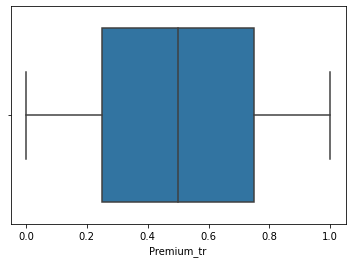

In [39]:
sns.boxplot(x = 'Premium_tr', data=df)


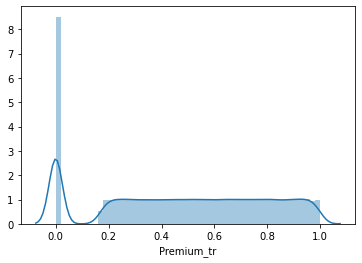

In [40]:
sns.distplot(df['Premium_tr'])

In [41]:
df.Premium_tr

id
1         0.773893
2         0.569206
3         0.721999
4         0.382197
5         0.340734
            ...   
381105    0.442450
381106    0.764717
381107    0.624859
381108    0.851447
381109    0.801351
Name: Premium_tr, Length: 381109, dtype: float64

In [42]:
numeric = ['Age','Vintage','Premium_tr']

In [43]:
X= df.drop(columns='Response')
y= df.Response

In [44]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((304887, 11), (76222, 11), (304887,), (76222,))

In [45]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',LogisticRegression(n_jobs=-1,random_state=42))
])
model_LR = pipline
model_LR.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Premium_tr']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one_hot

In [46]:
print(model_LR.score(X_train, y_train),model_LR.score(X_test, y_test))
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

0.8779908621882861 0.8750491983941644
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



Unbalanced Logistic Regression menghasilkan nilai 0 untuk precision, recall, dan f1.

### Unbalanced Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',DecisionTreeClassifier(random_state=42))
])
model_DecisionTree = pipline
model_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Premium_tr']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one_hot

In [48]:
print(model_DecisionTree.score(X_train, y_train),model_DecisionTree.score(X_test, y_test))
y_pred = model_DecisionTree.predict(X_test)
print(classification_report(y_test, y_pred))

0.9998852033704291 0.8220592479861457
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.29      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



Unbalanced Decision Tree menghasilkan nilai f1 30%.

### Unbalanced XGBoost

In [49]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

In [50]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',XGBClassifier(n_jobs=-1,random_state=42))
])
model_xgboost = pipline
model_xgboost.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [51]:
print(model_xgboost.score(X_train, y_train),model_xgboost.score(X_test, y_test))
y_pred = model_xgboost.predict(X_test)
print(classification_report(y_test, y_pred))

0.8811887682977628 0.8745900133819632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.02      0.05      9523

    accuracy                           0.87     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.87      0.82     76222



Dari ketiga model preliminary, algoritma XGBoost menghasilkan nilai presisi sedang dan f1 rendah. Selanjutnya, dicoba resample train data untuk meningkatkan nilai f1 pada ketiga algoritma.

## Resample Train Data

### Balanced Logistic Regression

In [52]:
from imblearn import over_sampling, under_sampling

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

In [53]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',LogisticRegression(n_jobs=-1,random_state=42))
])
model_LR = pipline
model_LR.fit(X_under,y_under)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [54]:
print(model_LR.score(X_train, y_train),model_LR.score(X_test, y_test))
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

0.6408505446280097 0.6433050825221065
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



Undersampling menaikkan nilai f1 Logistic Regression sampai 40%

### Balanced Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',DecisionTreeClassifier(random_state=42))
])
model_DecisionTree = pipline
model_DecisionTree.fit(X_under,y_under)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [56]:
print(model_DecisionTree.score(X_train, y_train),model_DecisionTree.score(X_test, y_test))
y_pred = model_DecisionTree.predict(X_test)
print(classification_report(y_test, y_pred))

0.7897516128926455 0.72271785048936
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     66699
           1       0.27      0.71      0.39      9523

    accuracy                           0.72     76222
   macro avg       0.61      0.72      0.60     76222
weighted avg       0.86      0.72      0.77     76222



Undersampling menaikkan nilai f1 Decision Tree sampai 39%

### Balanced XGBoost

In [57]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License']
numeric = ['Age','Vintage','Annual_Premium']

In [58]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',XGBClassifier(n_jobs=-1,random_state=42))
])
model_xgboost = pipline
model_xgboost.fit(X_under,y_under)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Vintage',
                                                   'Annual_Premium']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Region_Code',
                                                   'Previously_Insured',
                                                   'Policy_Sales_Channel',
                                                   'Driving_License']),
                                                 ('one

In [59]:
print(model_xgboost.score(X_train, y_train),model_xgboost.score(X_test, y_test))
y_pred = model_xgboost.predict(X_test)
print(classification_report(y_test, y_pred))

0.7111585603846671 0.7093490068484165
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66699
           1       0.29      0.92      0.44      9523

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.71      0.76     76222



Undersampling menaikkan nilai f1 XGBoost sampai 44%.
Selanjutnya, dicoba melakukan hyperparameter tuning untuk menaikkan nilai f1.

## Hyperparameter Tuning

In [60]:
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [61]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model_xg = RandomizedSearchCV(pipline,rsp.rf_params,cv=5,n_jobs=-1,verbose=1,n_iter=100,random_state=42)
best_model_xg.fit(X_under,y_under)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 88.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 101.8min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Vintage',
                                                                                'Annual_Premium']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(stra

In [63]:
print(best_model_xg.score(X_train, y_train),best_model_xg.score(X_test, y_test))
y_pred = best_model_xg.predict(X_test)
print(classification_report(y_test, y_pred))

0.6955724579926333 0.6972002833827504
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



In [64]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model = RandomizedSearchCV(pipline,rsp.rf_params,cv=3,n_jobs=-1,verbose=1,n_iter=100,random_state=42,scoring='f1')
best_model.fit(X_under,y_under)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 39.0min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Vintage',
                                                                                'Annual_Premium']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(stra

In [65]:
print(best_model.score(X_train, y_train),best_model.score(X_test, y_test))
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

0.4295132711009286 0.4334336764420275
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.75     76222



Hyperparameter Tuning tidak menaikkan nilai f1 XGBoost.
Selanjutnya, dicoba membuat feature baru untuk menaikkan nilai f1.

## Adding New Features

Kami melakukan segmentasi customer berdasarkan Usia dan kondisi kendaraan (Vehicle Damage).
Kedua fitur tersebut dibuat interaksi perkalian dengen fitur Previously Insured.
Previousy_Insured dipilih karena memiliki korelasi sedang dengan variabel Target (Response).

In [66]:
df2 = df.copy()

In [67]:
vehicle_damage = {'Yes': 1, 'No': 0}

df2['Vehicle_Damage'] = df2['Vehicle_Damage'].replace(vehicle_damage)

In [68]:
df2['Vehicle_Damage_mult_Previously_Insured'] = df2['Vehicle_Damage']*df2['Previously_Insured']
df2['Age_mult_Previously_Insured'] = df2['Age']*df2['Previously_Insured']

df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Premium_tr,Vehicle_Damage_mult_Previously_Insured,Age_mult_Previously_Insured
id,,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,0.773893,0,0
2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,0.569206,0,0
3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,0.721999,0,0
4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0.382197,0,21
5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0.340734,0,29


Setelah dibuat fitur baru, dicek apakah memiliki korelasi kuat dengan variabel lain.
Tujuannya untuk menghindari Multikolinearitas.

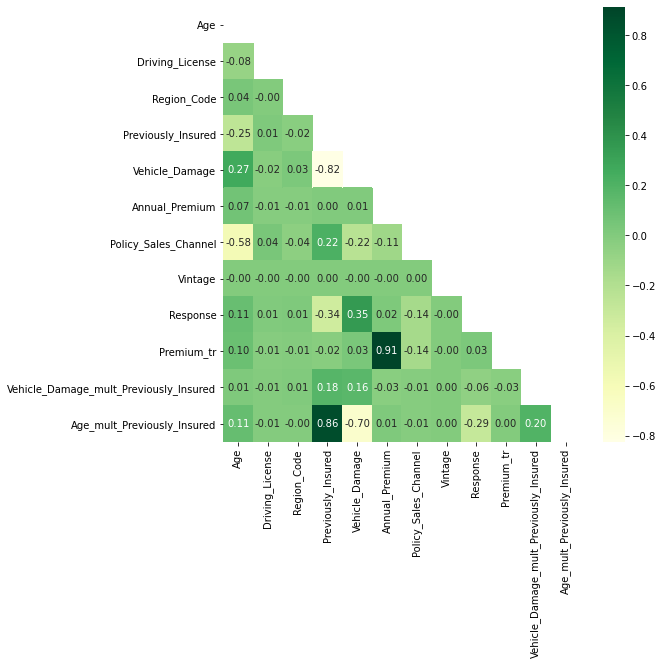

In [69]:
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
sns.heatmap(df2.corr(), cmap='YlGn', mask=mask, annot=True, fmt='.2f');

Age_mult_Previously_Insured memiliki korelasi kuat dengan Previously_Insured.
Dari 2 fitur baru, Hanya fitur Vehicle_Damage_mult_Previously_Insured yang masuk ke input pemodelan.

In [70]:
one_hot = ["Vehicle_Age","Vehicle_Damage","Gender"]
categoric = ['Region_Code','Previously_Insured','Policy_Sales_Channel','Driving_License','Vehicle_Damage_mult_Previously_Insured']
numeric = ['Age','Vintage','Annual_Premium']

In [71]:
X= df2.drop(columns='Response')
y= df2.Response

In [72]:
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((304887, 13), (76222, 13), (304887,), (76222,))

In [73]:
from imblearn import over_sampling, under_sampling

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

In [74]:
preprocessor = ColumnTransformer([
    ('numeric',num_pipe(),numeric), 
    ('categoric',cat_pipe(),categoric),
    ('one_hot',cat_pipe(encoder='onehot'),one_hot)
])

pipline = Pipeline([
    ('prep', preprocessor),
    ('algo',RandomForestClassifier(n_jobs=-1,random_state=42))
])

best_model = RandomizedSearchCV(pipline,rsp.rf_params,cv=3,n_jobs=-1,verbose=1,n_iter=100,random_state=42,scoring='f1')
best_model.fit(X_under,y_under)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 54.1min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Vintage',
                                                                                'Annual_Premium']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(stra

In [75]:
print(best_model.score(X_train, y_train),best_model.score(X_test, y_test))
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

0.42894540242102513 0.4334576813138899
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.75     76222



Penambahan fitur baru tidak meningkatkan nilai f1.

In [76]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.799


In [78]:
save_model(model_xgboost,'final_xgboost.pkl')

Model is pickled as model/final_xgboost.pkl


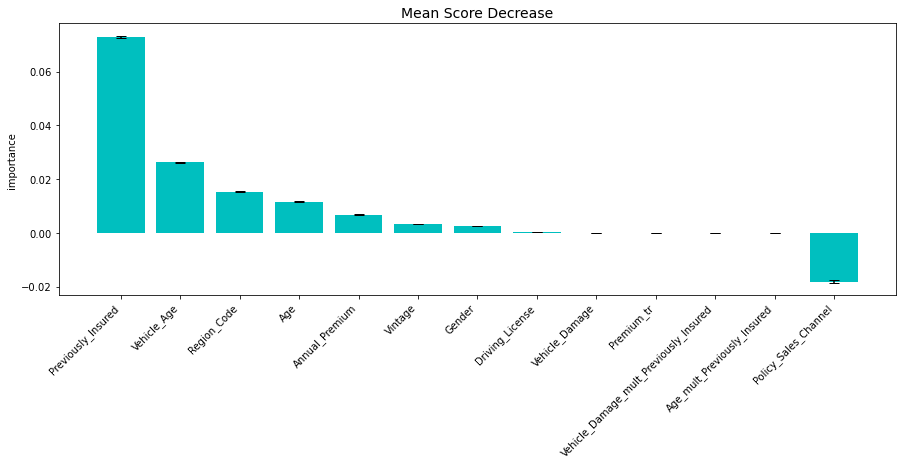

In [79]:
mp = mean_score_decrease(X_train, y_train, model_xgboost, plot=True)

In [80]:
import scikitplot as skplt
from scikitplot.metrics import plot_roc_curve
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [81]:
y_proba = model_xgboost.predict_proba(X_test)

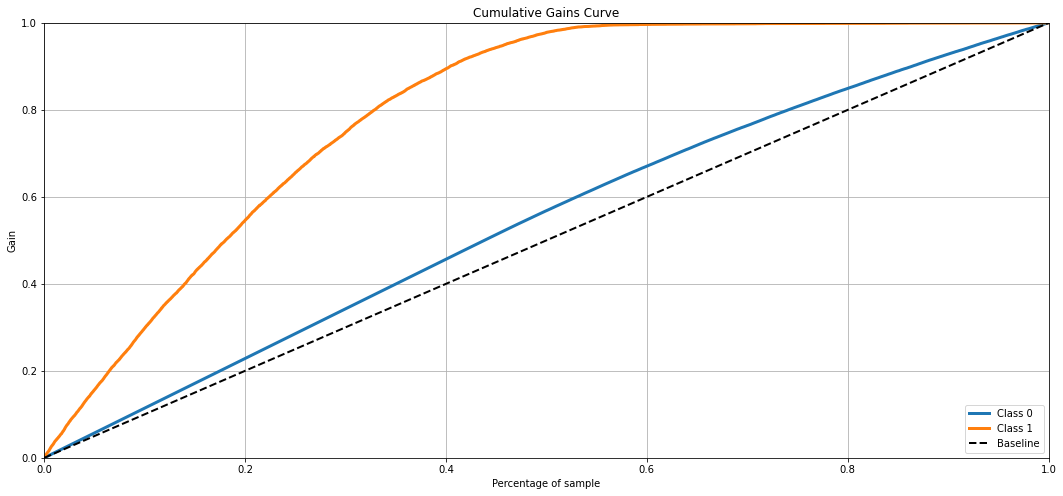

In [82]:
skplt.metrics.plot_cumulative_gain(y_test, y_proba, figsize=(18,8))
plt.show()

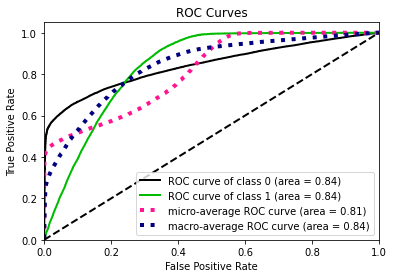

In [83]:
skplt.metrics.plot_roc_curve(y_test, y_proba)

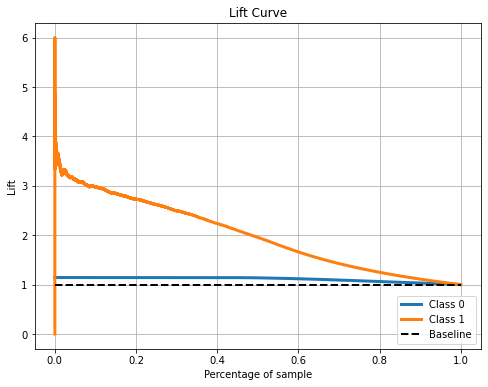

In [84]:
skplt.metrics.plot_lift_curve(y_test, y_proba, figsize=(8,6))
plt.show()

In [85]:
save_model(model_xgboost,'final_xgboost_fix_banget.pkl')

Model is pickled as model/final_xgboost_fix_banget.pkl


# Skenario Targeting

Model XGBoost menghasilkan output probabilitas kelas Positif dan kelas Negatif.

Dari proba kelas positif, bisa dikembangkan menjadi Lift Analysis, yaitu me-ranking customer yang merespons positif dari peluang yang tertinggi. Customer dengan peluang tertinggi akan diprioritaskan untuk dikontak

Lift Analysis merupakan subjenis Classification Model. Analisis ini berguna pada situasi di mana kesalahan klasifikasi mengakibatkan biaya tinggi. Contohnya dalam kasus customer targeting, pemilihan kandidat karyawan, dan lain-lain.

Shmueli, Galit.(2019). Lift Up and Act. Classifier Performance in Resource-Constrained Applications.

In [86]:
def lift (test, pred, cardinality):

    res = pd.DataFrame(np.column_stack((test, pred)),
                       columns=['Target','PR_0', 'PR_1'])

    res['scr_grp'] = pd.qcut(res['PR_0'], cardinality, labels=False)+1

    crt = pd.crosstab(res.scr_grp, res.Target).reset_index()
    crt = crt.rename(columns= {'Target':'Np',0.0: 'Negatives', 1.0: 'Positives'})

    G = crt['Positives'].sum()
    B = crt['Negatives'].sum()
   
    avg_resp_rate = G/(G+B)
    
    crt['resp_rate'] = round(crt['Positives']/(crt['Positives']+crt['Negatives']),2)
    crt['lift'] = round((crt['resp_rate']/avg_resp_rate),2)
    crt['rand_resp'] = 1/cardinality
    crt['cmltv_p'] = round((crt['Positives']).cumsum(),2)
    crt['cmltv_p_perc'] = round(((crt['Positives']/G).cumsum())*100,1)
    crt['cmltv_n'] = round((crt['Negatives']).cumsum(),2)  
    crt['cmltv_n_perc'] = round(((crt['Negatives']/B).cumsum())*100,1)   
    crt['cmltv_rand_p_perc'] = (crt.rand_resp.cumsum())*100
    crt['cmltv_resp_rate'] = round(crt['cmltv_p']/(crt['cmltv_p']+crt['cmltv_n']),2)   
    crt['cmltv_lift'] = round(crt['cmltv_resp_rate']/avg_resp_rate,2)
    crt['KS']=round(crt['cmltv_p_perc']-crt['cmltv_rand_p_perc'],2)
    crt = crt.drop(['rand_resp','cmltv_p','cmltv_n',], axis=1)
    
    
    print('average response rate: ' , avg_resp_rate)
    return crt

In [87]:
ModelLift = lift(y_test, y_proba, 12)

average response rate:  0.1249376820340584


In [88]:
y_test3 = y_test.to_frame().reset_index()
y_test3

,id,Response
0,200223,0
1,49767,0
2,172202,0
3,160714,0
4,53273,0
...,...,...
76217,258404,0
76218,234156,0
76219,24477,0
76220,60424,0


In [106]:
probs_df=pd.DataFrame(y_proba)
probs_df['real_values']=y_test3['Response']
probs_df['quantile']=pd.qcut(probs_df[1], 2, labels=False)
probs_df['quantile']=(2-probs_df['quantile'])%3
probs_df

,0,1,real_values,quantile
0,0.964251,0.035749,0,2
1,0.315184,0.684816,0,1
2,0.236641,0.763359,0,1
3,0.441902,0.558098,0,1
4,0.344458,0.655542,0,1
...,...,...,...,...
76217,0.575165,0.424835,0,1
76218,0.927670,0.072330,0,2
76219,0.998328,0.001672,0,2
76220,0.885728,0.114272,0,2


In [107]:
quantilethreshold=probs_df.groupby('quantile')[['real_values']].sum()
quantilethreshold['size']=probs_df.groupby('quantile')['real_values'].count()
quantilethreshold['quantile_threshold']=probs_df.groupby('quantile')[1].min()

quantilethreshold

,real_values,size,quantile_threshold
quantile,,,
1,9317,38111,0.355169
2,206,38111,0.000832


In [114]:
probs_df=pd.DataFrame(y_proba)
probs_df['real_values']=y_test3['Response']
probs_df['quantile']=pd.qcut(probs_df[1], 3, labels=False)
probs_df['quantile']=(3-probs_df['quantile'])%4
probs_df

,0,1,real_values,quantile
0,0.964251,0.035749,0,3
1,0.315184,0.684816,0,1
2,0.236641,0.763359,0,1
3,0.441902,0.558098,0,2
4,0.344458,0.655542,0,1
...,...,...,...,...
76217,0.575165,0.424835,0,2
76218,0.927670,0.072330,0,2
76219,0.998328,0.001672,0,3
76220,0.885728,0.114272,0,2


In [115]:
quantilethreshold=probs_df.groupby('quantile')[['real_values']].sum()
quantilethreshold['size']=probs_df.groupby('quantile')['real_values'].count()
quantilethreshold['quantile_threshold']=probs_df.groupby('quantile')[1].min()

quantilethreshold

,real_values,size,quantile_threshold
quantile,,,
1,7696,25407,0.651392
2,1804,25407,0.043539
3,23,25408,0.000832


In [117]:
probs_df=pd.DataFrame(y_proba)
probs_df['real_values']=y_test3['Response']
probs_df['quantile']=pd.qcut(probs_df[1], 4, labels=False)
probs_df['quantile']=(4-probs_df['quantile'])%5
probs_df

,0,1,real_values,quantile
0,0.964251,0.035749,0,3
1,0.315184,0.684816,0,2
2,0.236641,0.763359,0,1
3,0.441902,0.558098,0,2
4,0.344458,0.655542,0,2
...,...,...,...,...
76217,0.575165,0.424835,0,2
76218,0.927670,0.072330,0,3
76219,0.998328,0.001672,0,4
76220,0.885728,0.114272,0,3


In [118]:
quantilethreshold=probs_df.groupby('quantile')[['real_values']].sum()
quantilethreshold['size']=probs_df.groupby('quantile')['real_values'].count()
quantilethreshold['quantile_threshold']=probs_df.groupby('quantile')[1].min()

quantilethreshold

,real_values,size,quantile_threshold
quantile,,,
1,6242,19056,0.725356
2,3075,19055,0.355169
3,192,19055,0.025755
4,14,19056,0.000832


Targeting dimulai dari customer dengan peluang >81% (Quantile 1).
Response rate pada quantile ini:
- 2375 / 6352 = 37%

In [91]:
dec = ['Bulan 1','Bulan 2','Bulan 3','Bulan 4','Bulan 5','Bulan 6','Bulan 7','Bulan 8','Bulan 9','Bulan 10','Bulan 11','Bulan 12']
MLift=ModelLift[['Positives','Negatives','cmltv_lift','KS','cmltv_resp_rate']].copy()
MLift.index = (dec)

In [92]:
MLift['Baseline'] = MLift['Positives'].sum()/12
MLift

Target,Positives,Negatives,cmltv_lift,KS,cmltv_resp_rate,Baseline
Bulan 1,2375,3977,2.96,16.57,0.37,793.583333
Bulan 2,2074,4278,2.80,30.03,0.35,793.583333
Bulan 3,1793,4559,2.64,40.50,0.33,793.583333
Bulan 4,1454,4898,2.40,47.47,0.30,793.583333
Bulan 5,1010,5341,2.16,49.73,0.27,793.583333
Bulan 6,611,5741,1.92,47.80,0.24,793.583333
Bulan 7,167,6185,1.68,41.27,0.21,793.583333
Bulan 8,16,6336,1.52,33.13,0.19,793.583333
Bulan 9,9,6342,1.36,24.90,0.17,793.583333
Bulan 10,5,6347,1.20,16.57,0.15,793.583333


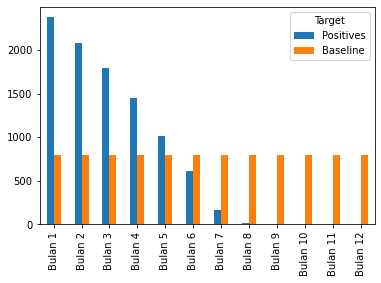

In [102]:
MLift[['Positives','Baseline']].plot(kind='bar')

Model XGBoost (batang biru) memberikan Lift sebesar 3.2 kali lebih kuat daripada model baseline (batang jingga)

In [95]:
import waterfall_chart

# Waterfall Chart

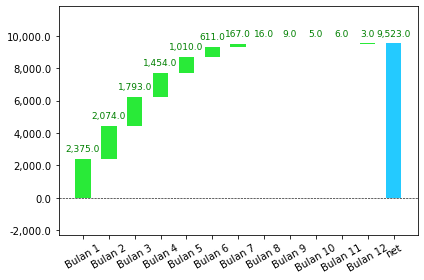

In [96]:
a = ['Bulan 1','Bulan 2','Bulan 3','Bulan 4','Bulan 5','Bulan 6','Bulan 7','Bulan 8','Bulan 9','Bulan 10','Bulan 11','Bulan 12']
b = MLift['Positives']
c = [778,778,778,778,778,778,778,778,778,778,778,778]
waterfall_chart.plot(a, b)
plt.grid(False)
plt.show()

Dengan Model XGBoost, kita bisa mencapai 80% target customer pada bulan ke-4. Dan pada bulan ke-5, adalah customer dengan peluang rendah. Project customer targeting bisa difinalisasi pada bulan ke-5.

In [97]:
xb = load_model("model/final_xgboost_fix_banget.pkl")

In [98]:
X= df.drop(columns='Response')
y= df.Response

In [99]:
y_pred = xb.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80    334399
           1       0.29      0.94      0.44     46710

    accuracy                           0.71    381109
   macro avg       0.64      0.81      0.62    381109
weighted avg       0.90      0.71      0.76    381109



In [100]:
from jcopml.plot import plot_confusion_matrix

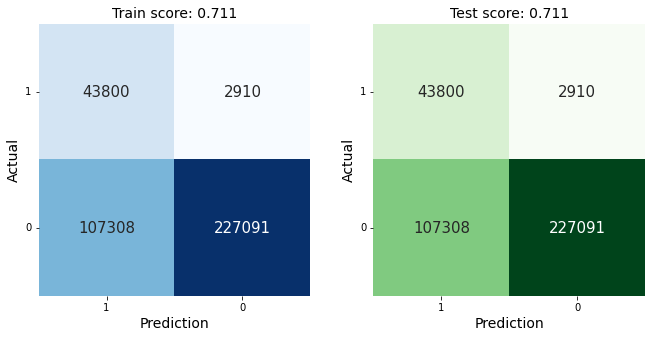

In [101]:
plot_confusion_matrix(X, y,X,y, xb)